In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn sqlalchemy plotly streamlit


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.5 MB 10.1 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.5 MB 13.1 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 13.5 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 15.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------------- ---

In [3]:
pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_excel("Online-Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Check shape
print("Shape:", df.shape)


Shape: (541909, 8)


In [7]:
# Data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Check how many missing values in each column
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Look at a few random rows
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
448624,575066,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2011-11-08 12:42:00,1.25,13668.0,United Kingdom
428709,573496,22419,LIPSTICK PEN RED,2,2011-10-31 11:59:00,0.42,17841.0,United Kingdom
218139,556018,23307,SET OF 60 PANTRY DESIGN CAKE CASES,24,2011-06-08 11:57:00,0.55,15382.0,United Kingdom
502708,578846,22845,VINTAGE CREAM CAT FOOD CONTAINER,2,2011-11-25 17:27:00,6.35,17757.0,United Kingdom
318818,564838,22452,MEASURING TAPE BABUSHKA PINK,2,2011-08-30 12:43:00,1.63,NaN,United Kingdom


In [10]:
# Create a copy of the original dataset
df_original = df.copy()

In [11]:
# Now work on the copy
df_cleaned = df_original.copy()

In [12]:
df_cleaned = df_cleaned.dropna(subset=['CustomerID'])


In [13]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]


In [14]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [15]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [16]:
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(str)


In [17]:
print("✅ Cleaned dataset shape:", df_cleaned.shape)
df_cleaned.head()


✅ Cleaned dataset shape: (397884, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
# Set snapshot date 1 day after the latest invoice date
snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Snapshot Date:", snapshot_date)


Snapshot Date: 2011-12-10 12:50:00


In [19]:
# Grouping by CustomerID
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Renaming columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Display top 5
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [20]:
# Recency score: lower recency means better (recent customer)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency score: higher frequency means better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary score: higher spending means better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])


In [21]:
# Concatenate RFM score as string
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Calculate RFM Score as a numeric sum (optional, for sorting or further analysis)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

# Show a few rows
rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,7,4310.00,5,5,5,555,15
12348.0,75,4,1797.24,2,4,4,244,10
12349.0,19,1,1757.55,4,1,4,414,9
12350.0,310,1,334.40,1,1,2,112,4


In [22]:
def segment_customer(rfm):
    if rfm['RFM_Score'] >= 9:
        return 'Champions'
    elif rfm['RFM_Score'] >= 8:
        return 'Loyal'
    elif rfm['RFM_Score'] >= 6:
        return 'Potential Loyalist'
    elif rfm['RFM_Score'] >= 5:
        return 'Needs Attention'
    else:
        return 'At Risk'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# View segment counts
rfm['Segment'].value_counts()


Segment
Champions             2277
Potential Loyalist     800
At Risk                545
Loyal                  378
Needs Attention        338
Name: count, dtype: int64

C:\Users\mrmoi\AppData\Local\Temp\ipykernel_13696\2841798813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')


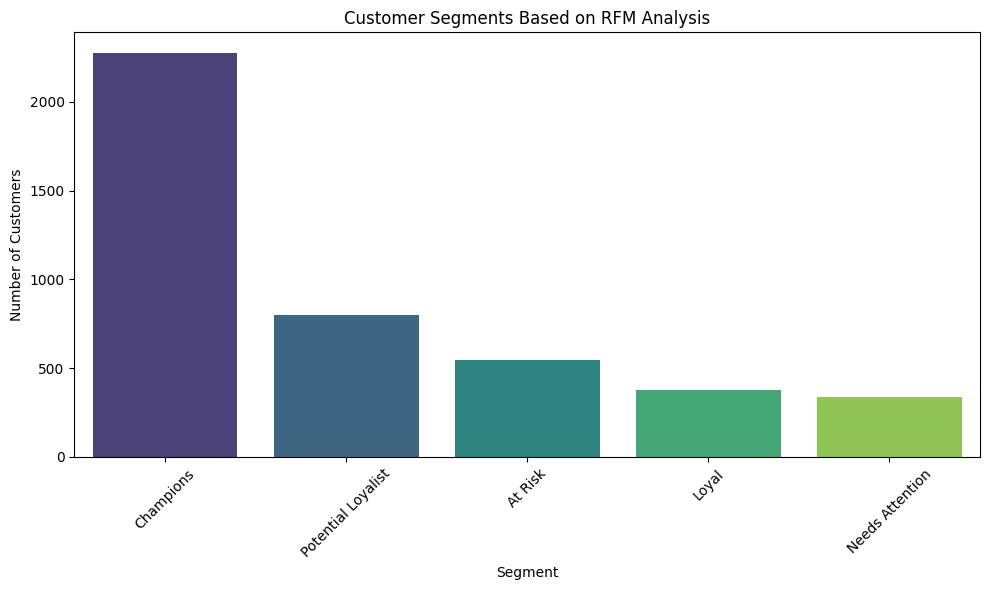

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title("Customer Segments Based on RFM Analysis")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Cohort analysis

In [25]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Invoice month
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Cohort month = month of first purchase by each customer
df_cleaned['CohortMonth'] = df_cleaned.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


In [27]:
# Convert Period columns to timestamps for calculations
invoice_ts = df_cleaned['InvoiceMonth'].dt.to_timestamp()
cohort_ts = df_cleaned['CohortMonth'].dt.to_timestamp()

# Calculate CohortIndex using row-wise difference
df_cleaned['CohortIndex'] = (invoice_ts.dt.year - cohort_ts.dt.year) * 12 + (invoice_ts.dt.month - cohort_ts.dt.month) + 1


In [28]:
cohort_data = df_cleaned.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')


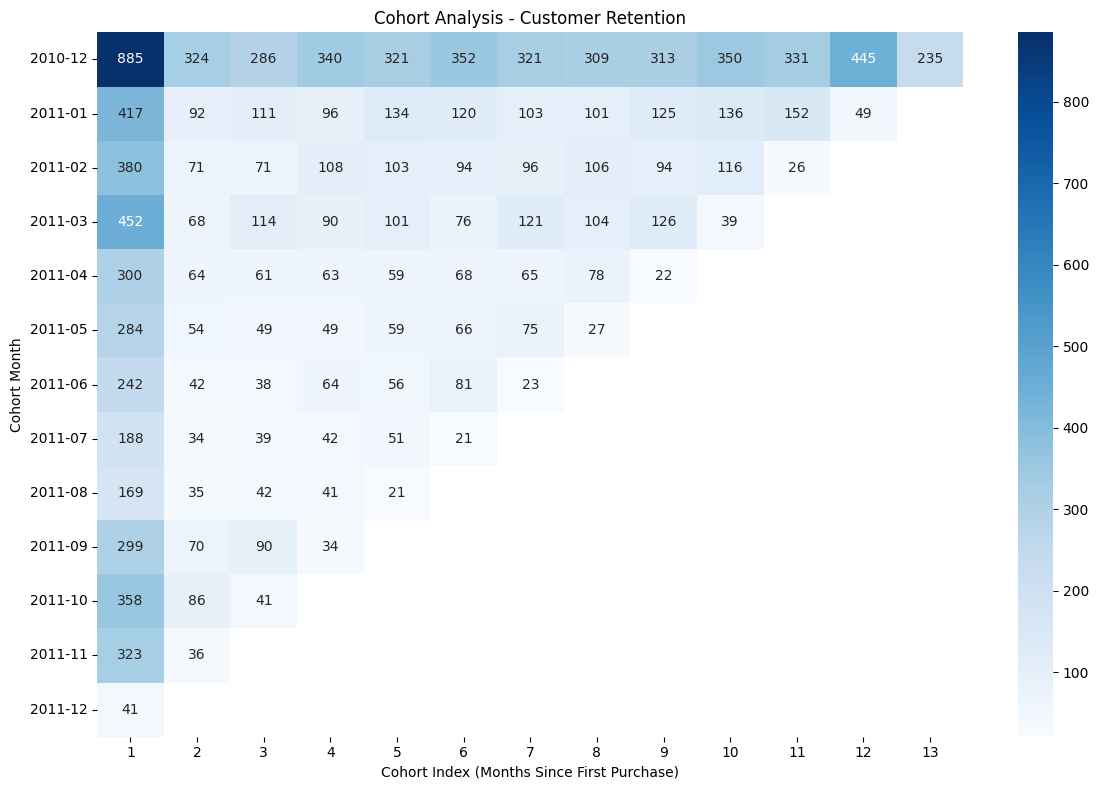

In [29]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Cohort Analysis - Customer Retention')
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()
